<a href="https://colab.research.google.com/github/isaacyeSN/SS2021/blob/main/Day2PM/Copy_of_SS21_assgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification (CIFAR10)**

### **1)MLP Model**
### **2)CNN Model**

# 0. Important necessary modules

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import time
import numpy as np
import matplotlib.pyplot as plt

# 1.Data Preparation

The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. (https://www.cs.toronto.edu/~kriz/cifar.html)


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Data Set**  
$$X_{train} \in \mathcal{R}^{40000 \times 1024}, Y_{train} \in \mathcal{Z}^{40000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 1024}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 1024}, Y_{test} \in \mathcal{Z}^{10000}$$

### Data loading using dataloader

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainset, valset = torch.utils.data.random_split(trainset, [40000, 10000])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

val_loader = torch.utils.data.DataLoader(valset, batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Inspecting dataset

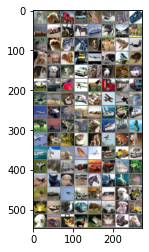

  dog horse truck   car  frog  ship truck   car truck truck   cat horse  ship  bird plane  deer  deer   dog   cat  ship   dog horse  frog plane   cat horse   dog   car plane plane truck  frog   cat   dog   dog   car   cat  bird  frog   car   car   car   car plane horse truck  ship truck  bird  bird   dog truck horse plane  bird  bird plane   car   cat  ship plane  ship  frog truck  deer  ship  frog   dog  frog  ship   car horse plane   dog  deer   cat truck  bird  frog   dog plane horse   dog  bird plane horse truck   car plane  bird truck truck   car truck  ship  frog plane   cat   dog  deer horse truck horse  bird  bird  ship  bird plane   cat truck   dog  frog   car  ship  bird truck horse truck   dog truck   dog   car   cat  deer  frog   cat truck horse
<class 'torch.Tensor'> torch.Size([128, 3, 32, 32])
<class 'torch.Tensor'> torch.Size([128]) tensor([5, 7, 9, 1, 6, 8, 9, 1, 9, 9, 3, 7, 8, 2, 0, 4, 4, 5, 3, 8, 5, 7, 6, 0,
        3, 7, 5, 1, 0, 0, 9, 6, 3, 5, 5, 1, 3, 2, 6, 1, 1, 

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

print(type(images), images.shape)
print(type(labels), labels.shape, labels)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Checking GPU

In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


# 2. Model Define

### **MLP Model**

### **CNN Model**

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 3,
                               out_channels = 64,
                               kernel_size = 3,
                               stride = 1,
                               padding = 1) # To maintain the image size, you need to take # of kernel_size %2 for padding
        
        self.conv2 = nn.Conv2d(in_channels = 64,
                               out_channels = 256,
                               kernel_size = 5,
                               stride = 1,
                               padding = 2)
        self.act = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(65536, 10) # 256x32x32 ---> max pooling ---> 256x16x16 = 65536

    def forward(self, x):
        x = self.conv1(x)
        x = self.act(x)
        x = self.conv2(x)
        x = self.act(x)
        x = self.maxpool1(x)
        x = self.fc(x.view(x.size(0), -1))
        return x

In [8]:
net = CNN()
print(net)
x = torch.randn(128,3,32,32)
y = net(x)
print(y.size())

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=65536, out_features=10, bias=True)
)
torch.Size([128, 10])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# 3. Simulation Define

In [9]:
def experiment(args):
    #model = LinearModel(args.in_dim, args.out_dim)
    #model = MLPModel(args.in_dim, args.out_dim, args.hid_dim, args.n_layers, args.act, args.dropout, args.use_bn, args.use_xavier)

    model = CNN()
    print(model)

    # ===== GPU ===== #
    model.to(device)

    # ====== Loss function ====== #
    #criterion = nn.MSELoss()
    criterion = nn.CrossEntropyLoss() #Image classification

    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

    # ====== Data collection ====== #
    list_epoch = [] 
    list_train_loss = []
    list_val_loss = []
    list_acc = []
    list_acc_epoch = []

    # ====== Loop ====== #
    for epoch in range(args.epoch):  
        
        # ====== Train ====== #
        model.train() # Set the model be 'train mode' 
        train_loss = 0 # to sum up each batch
        
        for input_X, true_y in train_loader:
            optimizer.zero_grad() # Initialize the gradient in the optimizer

            # input_X = input_X.squeeze()
            # input_X = input_X.view(-1, 784)

            # ===== GPU ===== #
            input_X = input_X.to(device)
            true_y = true_y.to(device)

            pred_y = model(input_X)

            loss = criterion(pred_y.squeeze(), true_y)
#            loss = criterion(pred_y, true_y)
            loss.backward()
            optimizer.step()
            train_loss +=loss.item()

        train_loss = train_loss / len(train_loader)
        list_train_loss.append(train_loss)
        list_epoch.append(epoch)

        # ====== Validation ====== #
        model.eval() # Set the model be 'train mode' 
        val_loss = 0 # to sum up each batch
        
        with torch.no_grad():
            for input_X, true_y in val_loader:

                # input_X = input_X.squeeze()
                # input_X = input_X.view(-1, 784)

               # ===== GPU ===== #
                input_X = input_X.to(device)
                true_y = true_y.to(device)

                pred_y = model(input_X)

                loss = criterion(pred_y.squeeze(), true_y)
#                loss = criterion(pred_y, true_y)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)

        # ====== Evaluation ====== #
        model.eval() # Set the model be 'train mode' 
        correct = 0 # to sum up each batch
        
        with torch.no_grad():
            for input_X, true_y in test_loader:

                # input_X = input_X.squeeze()
                # input_X = input_X.view(-1, 784)
                
                # ===== GPU ===== #
                input_X = input_X.to(device)
                true_y = true_y.to(device)

                pred_y = model(input_X).max(1, keepdim=True)[1].squeeze()
                correct += pred_y.eq(true_y).sum()

            acc = correct.item() / len(test_loader.dataset)
            list_acc.append(acc)
            list_acc_epoch.append(epoch)
        
        print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(epoch, train_loss, val_loss, acc*100))

    return list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch

In [ ]:
ts = time.time()

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()

args = parser.parse_args("")

args.in_dim = 1024  # 32x32 (we only need for MLP)
args.out_dim = 10
args.hid_dim = 200
args.n_layers = 5
args.act = 'relu'
args.dropout = 0.1
args.use_bn = 'True'
args.use_xavier = 'True'
args.momentum = 0.9

args.lr = 0.005
args.epoch = 10

list_epoch, list_train_loss, list_val_loss, list_acc, list_acc_epoch = experiment(args)

te = time.time()

print('Elapsed time: {} sec'.format(int(te-ts)))

CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=65536, out_features=10, bias=True)
)
Epoch: 0, Train Loss: 1.55048079688709, Val Loss: 1.2711008515539048, Test Acc: 55.25%
Epoch: 1, Train Loss: 1.1624769010482885, Val Loss: 1.1267766756347464, Test Acc: 60.540000000000006%
Epoch: 2, Train Loss: 0.9942775728603521, Val Loss: 0.9991483492187306, Test Acc: 65.2%
Epoch: 3, Train Loss: 0.8829946338939971, Val Loss: 0.942658284042455, Test Acc: 66.92%


# 5. Report

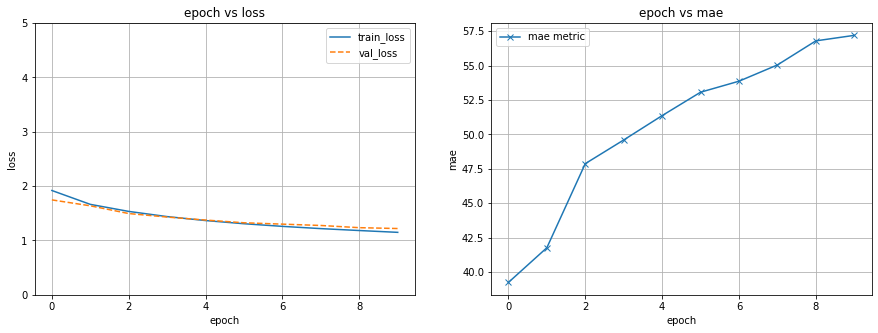

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()